### You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

## Data Fields

**datetime** - hourly date + timestamp  
**season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter  
**holiday** - whether the day is considered a holiday  
**workingday** - whether the day is neither a weekend nor holiday  
**weather** -1: Clear, Few clouds, Partly cloudy, Partly cloudy  
            2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
            3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
            4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
**temp** - temperature in Celsius  
**atemp** - "feels like" temperature in Celsius  
**humidity** - relative humidity  
**windspeed** - wind speed  
**casual** - number of non-registered user rentals initiated  
**registered** - number of registered user rentals initiated  
**count** - number of total rentals  


In [30]:
import numpy as np
import pandas as pd

In [31]:
import numpy as np 
import pandas as pd
bikes=pd.read_csv('./bike-sharing/train.csv')
bikes_test=pd.read_csv('./bike-sharing/test.csv')

In [33]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [34]:
bikes.rename(columns={'count': 'total'}, inplace=True)
dt = bikes_test['datetime']

In [49]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate,train_test_split

In [39]:
temp = pd.DatetimeIndex(bikes['datetime'])
bikes['dayofweek'] = temp.dayofweek
bikes["hour"] = temp.hour
bikes["month"] = temp.month
bikes['year']= temp.year
temp_t=pd.DatetimeIndex(bikes_test['datetime'])
bikes_test["dayofweek"] = temp_t.dayofweek
bikes_test["hour"] = temp_t.hour
bikes_test["month"] = temp_t.month
bikes_test['year']= temp_t.year

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


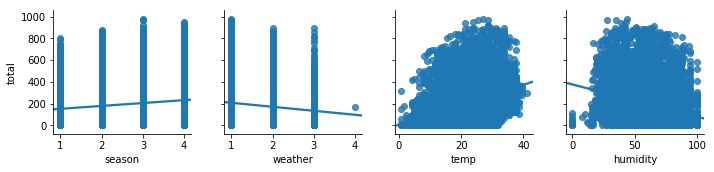

In [40]:
import seaborn as sns
sns.pairplot(bikes, x_vars=['season', 'weather', 'temp', 'humidity'], y_vars='total', kind='reg')

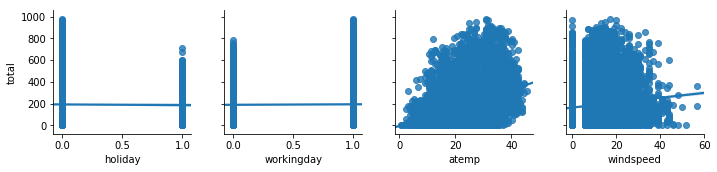

In [41]:
sns.pairplot(bikes, x_vars=['holiday', 'workingday','atemp', 'windspeed'], y_vars='total', kind='reg')

In [42]:
bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,dayofweek,hour,month,year
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.010553,-0.006546,0.971524,-0.004797
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.191832,-0.000354,0.001731,0.012021
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.704267,0.002780,-0.003394,-0.002482
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.047692,-0.022740,0.012144,-0.012548
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,-0.038466,0.145430,0.257589,0.061226
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,-0.040235,0.140343,0.264173,0.058540
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.026507,-0.278011,0.204537,-0.078606
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.024804,0.146631,-0.150192,-0.015221
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.246959,0.302045,0.092722,0.145241
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,-0.084427,0.380540,0.169451,0.264265


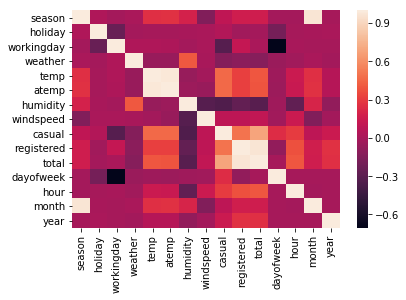

In [43]:
sns.heatmap(bikes.corr())

In [44]:
X=bikes.drop(['casual','registered','total','datetime'],axis=1)
y=bikes['total']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
dayofweek     10886 non-null int64
hour          10886 non-null int64
month         10886 non-null int64
year          10886 non-null int64
dtypes: float64(3), int64(9)
memory usage: 1020.6 KB


In [45]:
new_y = np.log(y + 1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, new_y, test_size = 0.33, random_state = 42)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
prediction = rf.predict(X_test)
mean_squared_error(y_test, prediction)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.10314785859884334

In [51]:
rf.fit(X, new_y)
bikes_test= bikes_test.drop(['datetime'],axis=1)
prediction = rf.predict(bikes_test)
prediction = np.exp(prediction) - 1

In [52]:
df=pd.DataFrame({'datetime':dt, 'count':prediction})
df

,datetime,count
0,2011-01-20 00:00:00,10.327495
1,2011-01-20 01:00:00,5.381817
2,2011-01-20 02:00:00,4.035579
3,2011-01-20 03:00:00,4.306209
4,2011-01-20 04:00:00,2.866364
5,2011-01-20 05:00:00,4.786012
6,2011-01-20 06:00:00,36.194875
7,2011-01-20 07:00:00,98.776118
8,2011-01-20 08:00:00,215.031792
9,2011-01-20 09:00:00,128.577430
